 **ML ANALYSIS**

**NAME: SURAJ SUBRAMANIAN**


Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset Description:

Age, Sex, cp(chest pain type), trtbps(resting blood pressure), chol(cholestrol level), fbs(fasting blood sugar>120 1/0), restecg(resting electrocardiographic results), thalachh(max heart rate), exng(exercise induced angina 1/0), oldpeak

In [ ]:
df  = pd.read_csv('heart_new.csv')

In [ ]:
df.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [ ]:
# ALL UNIQUE VALUES AND NUMBER OF UNIQUE VALUES
zip = {}

for i in list(df.columns):
  zip[i] = df[i].value_counts().shape[0]

pd.DataFrame(zip,index=["unique count"]).transpose()


,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,90
exng,2
oldpeak,40


We can conclude that 'sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall' are all Categorical Features.

The others, 'age', 'trtbps', 'chol', 'thalachh', 'oldpeak' are Continuous Features.

Our output/Target is 'output' column.

## NULL Handling

In [ ]:
df.isnull().sum()

age         3
sex         3
cp          3
trtbps      3
chol        3
fbs         3
restecg     3
thalachh    3
exng        3
oldpeak     3
slp         3
caa         3
thall       3
output      3
dtype: int64

NULL value visualization

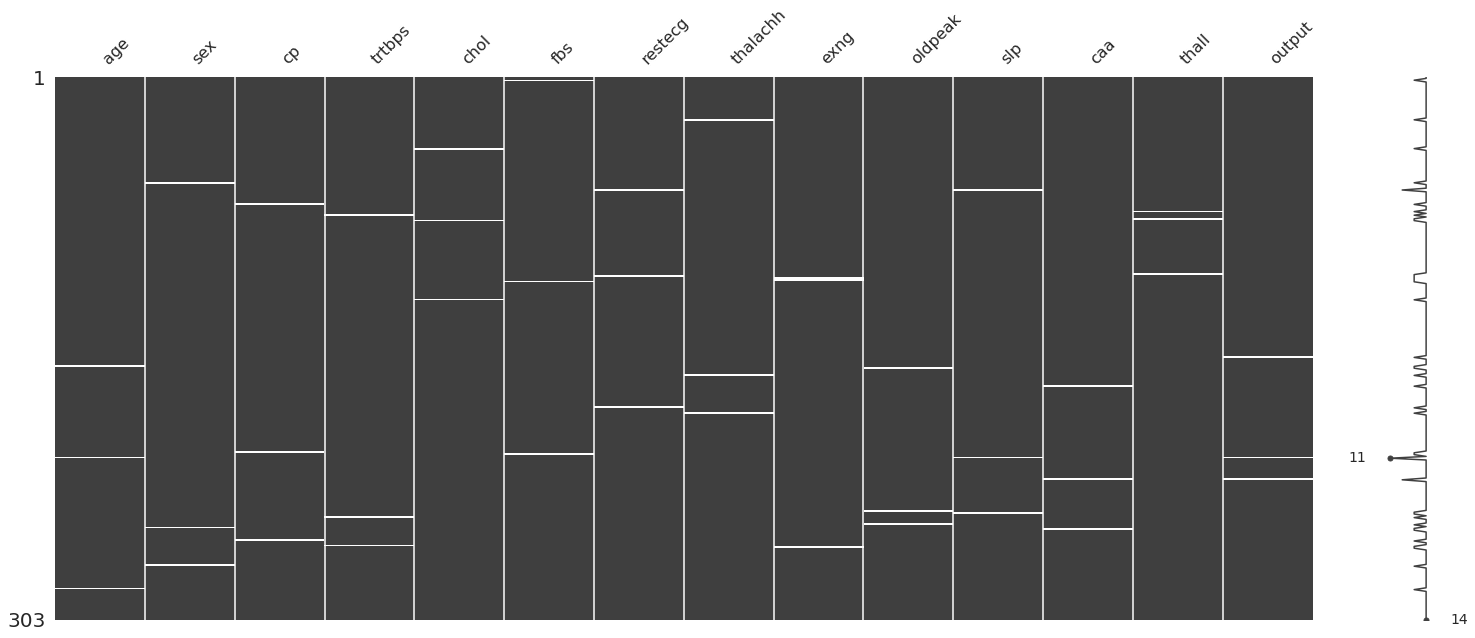

In [ ]:
import missingno as mno

mno.matrix(df)

There are some NULL data values

Handling NULL values in categorical data: removal, so as to not introduce bias

In [ ]:
cat_var = [ 'sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall', 'output']
for col in cat_var:
  df = df[df[col].notna()]

In [ ]:
df.isnull().sum()

age         2
sex         0
cp          0
trtbps      3
chol        3
fbs         0
restecg     0
thalachh    3
exng        0
oldpeak     3
slp         0
caa         0
thall       0
output      0
dtype: int64

### Correlation Analysis

Finding correlations to see if we can apply regression to fill NULL values of continuous data

In [ ]:
con_var =['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
correl = df.corr()
correl

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.080108,-0.077983,0.276758,0.207828,0.128023,-0.129944,-0.417712,0.097181,0.211212,-0.180828,0.305233,0.080605,-0.236870
sex,-0.080108,1.000000,-0.058719,-0.022495,-0.181080,0.051565,-0.073811,-0.028364,0.143279,0.104912,-0.019594,0.123579,0.194648,-0.281138
cp,-0.077983,-0.058719,1.000000,0.062502,-0.071382,0.100528,0.062242,0.266141,-0.404920,-0.142414,0.111205,-0.178001,-0.169363,0.426061
trtbps,0.276758,-0.022495,0.062502,1.000000,0.111896,0.175692,-0.131529,-0.058411,0.065839,0.203244,-0.136444,0.113637,0.088722,-0.164266
chol,0.207828,-0.181080,-0.071382,0.111896,1.000000,0.027877,-0.150254,0.026193,0.066630,0.041209,0.000231,0.067039,0.121069,-0.089980
fbs,0.128023,0.051565,0.100528,0.175692,0.027877,1.000000,-0.088851,-0.012174,0.031125,0.008956,-0.059532,0.089797,-0.040893,-0.020790
restecg,-0.129944,-0.073811,0.062242,-0.131529,-0.150254,-0.088851,1.000000,0.071813,-0.093750,-0.041108,0.083849,-0.071954,-0.020427,0.150587
thalachh,-0.417712,-0.028364,0.266141,-0.058411,0.026193,-0.012174,0.071813,1.000000,-0.403398,-0.338859,0.372484,-0.204457,-0.084706,0.399309
exng,0.097181,0.143279,-0.404920,0.065839,0.066630,0.031125,-0.093750,-0.403398,1.000000,0.310919,-0.267697,0.096735,0.190929,-0.452273
oldpeak,0.211212,0.104912,-0.142414,0.203244,0.041209,0.008956,-0.041108,-0.338859,0.310919,1.000000,-0.572334,0.224868,0.227972,-0.418169


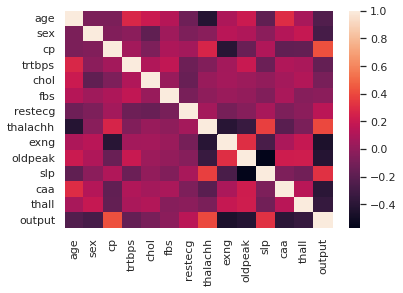

In [ ]:
sns.heatmap(correl)

In [ ]:
correl.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.084528,0.062334,0.066136,0.113225,0.084091,0.099380,0.040490,0.041990,0.027186,0.058601,0.033731,0.089165,0.090842,-0.007292
std,0.337700,0.298946,0.337481,0.287918,0.284473,0.269663,0.291147,0.377804,0.370399,0.381199,0.363701,0.321046,0.307849,0.419904
min,-0.417712,-0.281138,-0.404920,-0.164266,-0.181080,-0.088851,-0.150254,-0.417712,-0.452273,-0.572334,-0.572334,-0.391250,-0.347673,-0.452273
25%,-0.117485,-0.070038,-0.126306,-0.049432,-0.053479,-0.018636,-0.092525,-0.174520,-0.224210,-0.117088,-0.130539,-0.071627,-0.073753,-0.331039
50%,0.088893,-0.021045,0.001761,0.077280,0.034543,0.029501,-0.056531,-0.020269,0.066234,0.073061,-0.039563,0.093266,0.084664,-0.127123
75%,0.210366,0.118912,0.108536,0.160178,0.100682,0.097845,0.069421,0.217559,0.131754,0.221454,0.104366,0.138693,0.179129,0.280921
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Seeing 2nd highest correlation value (since highest is 1, which is useless)

In [ ]:
for col in correl.columns:
  print(correl[col].nlargest(2))

age    1.000000
caa    0.305233
Name: age, dtype: float64
sex      1.000000
thall    0.194648
Name: sex, dtype: float64
cp        1.000000
output    0.426061
Name: cp, dtype: float64
trtbps    1.000000
age       0.276758
Name: trtbps, dtype: float64
chol    1.000000
age     0.207828
Name: chol, dtype: float64
fbs       1.000000
trtbps    0.175692
Name: fbs, dtype: float64
restecg    1.000000
output     0.150587
Name: restecg, dtype: float64
thalachh    1.000000
output      0.399309
Name: thalachh, dtype: float64
exng       1.000000
oldpeak    0.310919
Name: exng, dtype: float64
oldpeak    1.000000
exng       0.310919
Name: oldpeak, dtype: float64
slp         1.000000
thalachh    0.372484
Name: slp, dtype: float64
caa    1.000000
age    0.305233
Name: caa, dtype: float64
thall      1.000000
oldpeak    0.227972
Name: thall, dtype: float64
output    1.000000
cp        0.426061
Name: output, dtype: float64


No strong correlations, hence we analyse distribution to find the best replacement for NULL values.

### Distribution Visualization


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

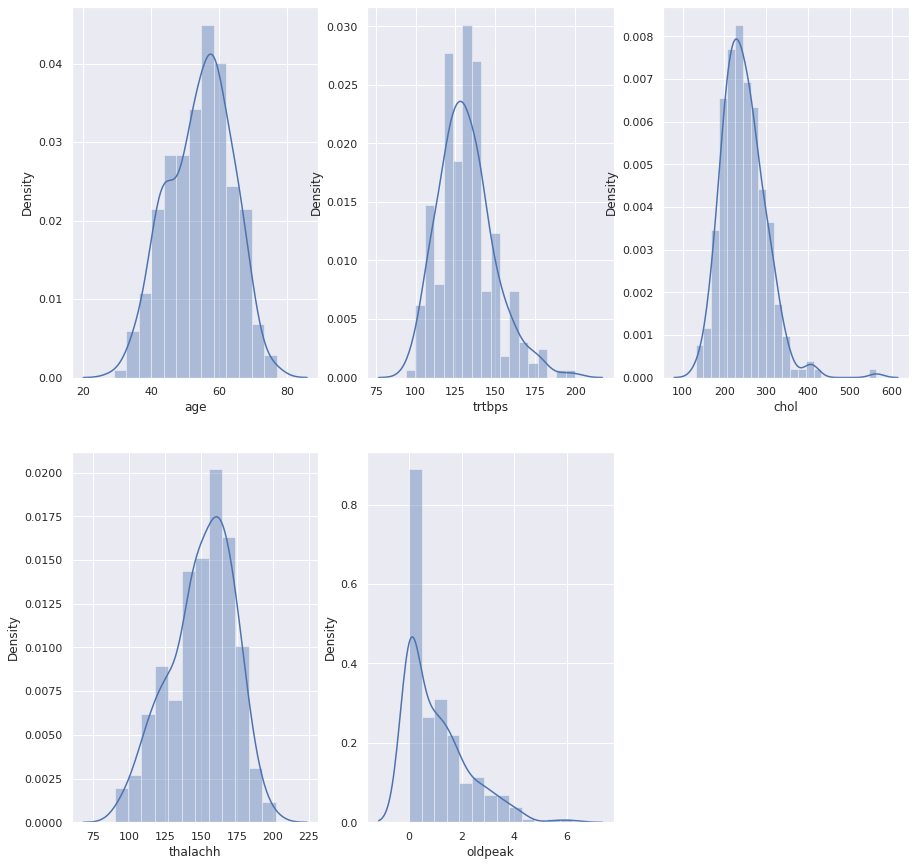

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(2, 3, 1)
sns.distplot(df['age'])

plt.subplot(2, 3, 2)
sns.distplot(df['trtbps'])

plt.subplot(2, 3, 3)
sns.distplot(df['chol'])

plt.subplot(2, 3, 4)
sns.distplot(df['thalachh'])

plt.subplot(2, 3, 5)
sns.distplot(df['oldpeak'])

All features except 'oldpeak' do not have heavy skewness, hence we will use Mean to replace their NULL values.

For 'oldpeak', we will use Mode as a NULL value replacement due to its skewness.

In [ ]:
cols_mean = ['age', 'trtbps', 'chol', 'thalachh']
for col in cols_mean:
  df[col] = df[col].fillna(df[col].mean())


In [ ]:
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mode().iloc[0])


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

No NULL values present

## Feature Visualization

### Boxplot Visualization for Continuous Features

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

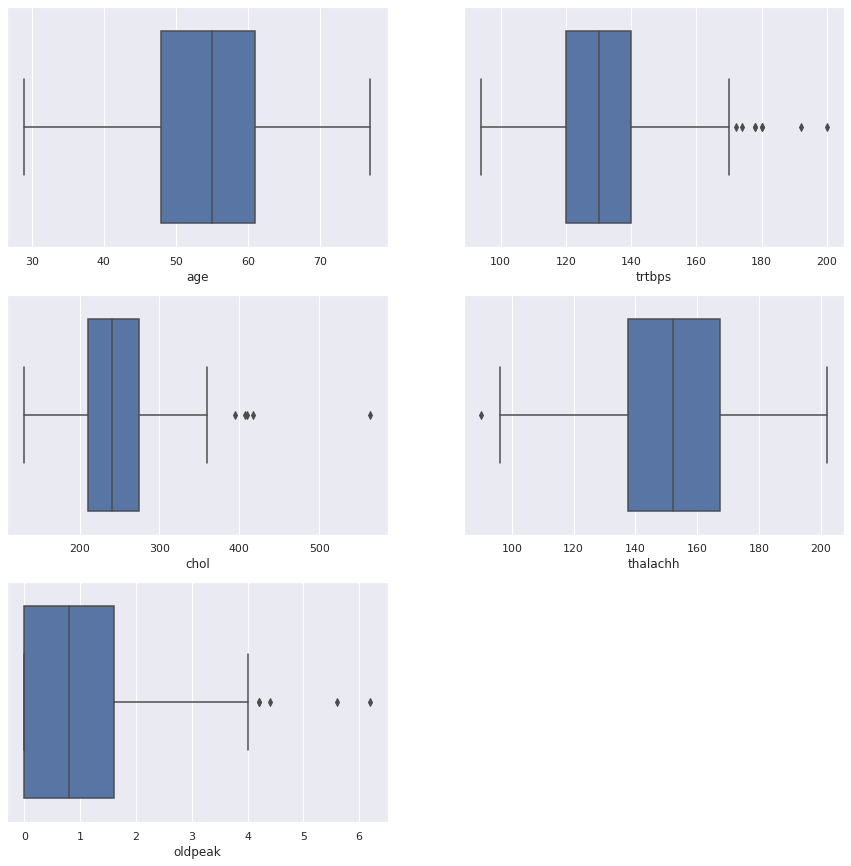

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(3, 2, 1)
sns.boxplot(df['age'])

plt.subplot(3, 2, 2)
sns.boxplot(df['trtbps'])

plt.subplot(3, 2, 3)
sns.boxplot(df['chol'])

plt.subplot(3, 2, 4)
sns.boxplot(df['thalachh'])

plt.subplot(3, 2, 5)
sns.boxplot(df['oldpeak'])

### Countplot Visualization for Categorical Features

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

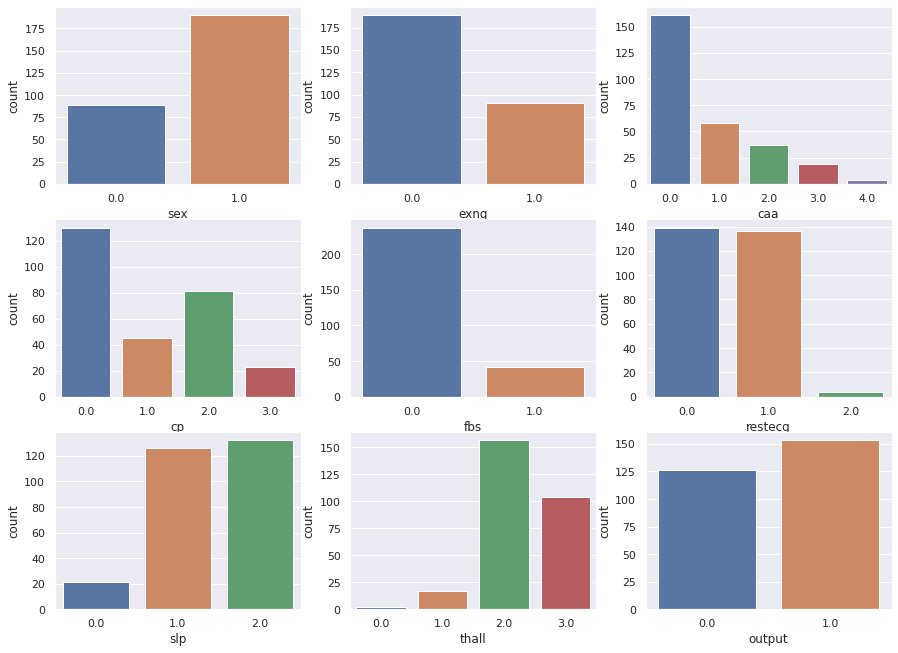

In [ ]:
cat_var = [ 'sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall', 'output']

plt.figure(figsize=(15,15))
sns.set_theme(style="darkgrid")

plt.subplot(4, 3, 1)
sns.countplot(df['sex'])

plt.subplot(4, 3, 2)
sns.countplot(df['exng'])

plt.subplot(4, 3, 3)
sns.countplot(df['caa'])

plt.subplot(4, 3, 4)
sns.countplot(df['cp'])

plt.subplot(4, 3, 5)
sns.countplot(df['fbs'])

plt.subplot(4, 3, 6)
sns.countplot(df['restecg'])

plt.subplot(4, 3, 7)
sns.countplot(df['slp'])

plt.subplot(4, 3, 8)
sns.countplot(df['thall'])

plt.subplot(4, 3, 9)
sns.countplot(df['output'])

### Paiplot for visualising Feature relations

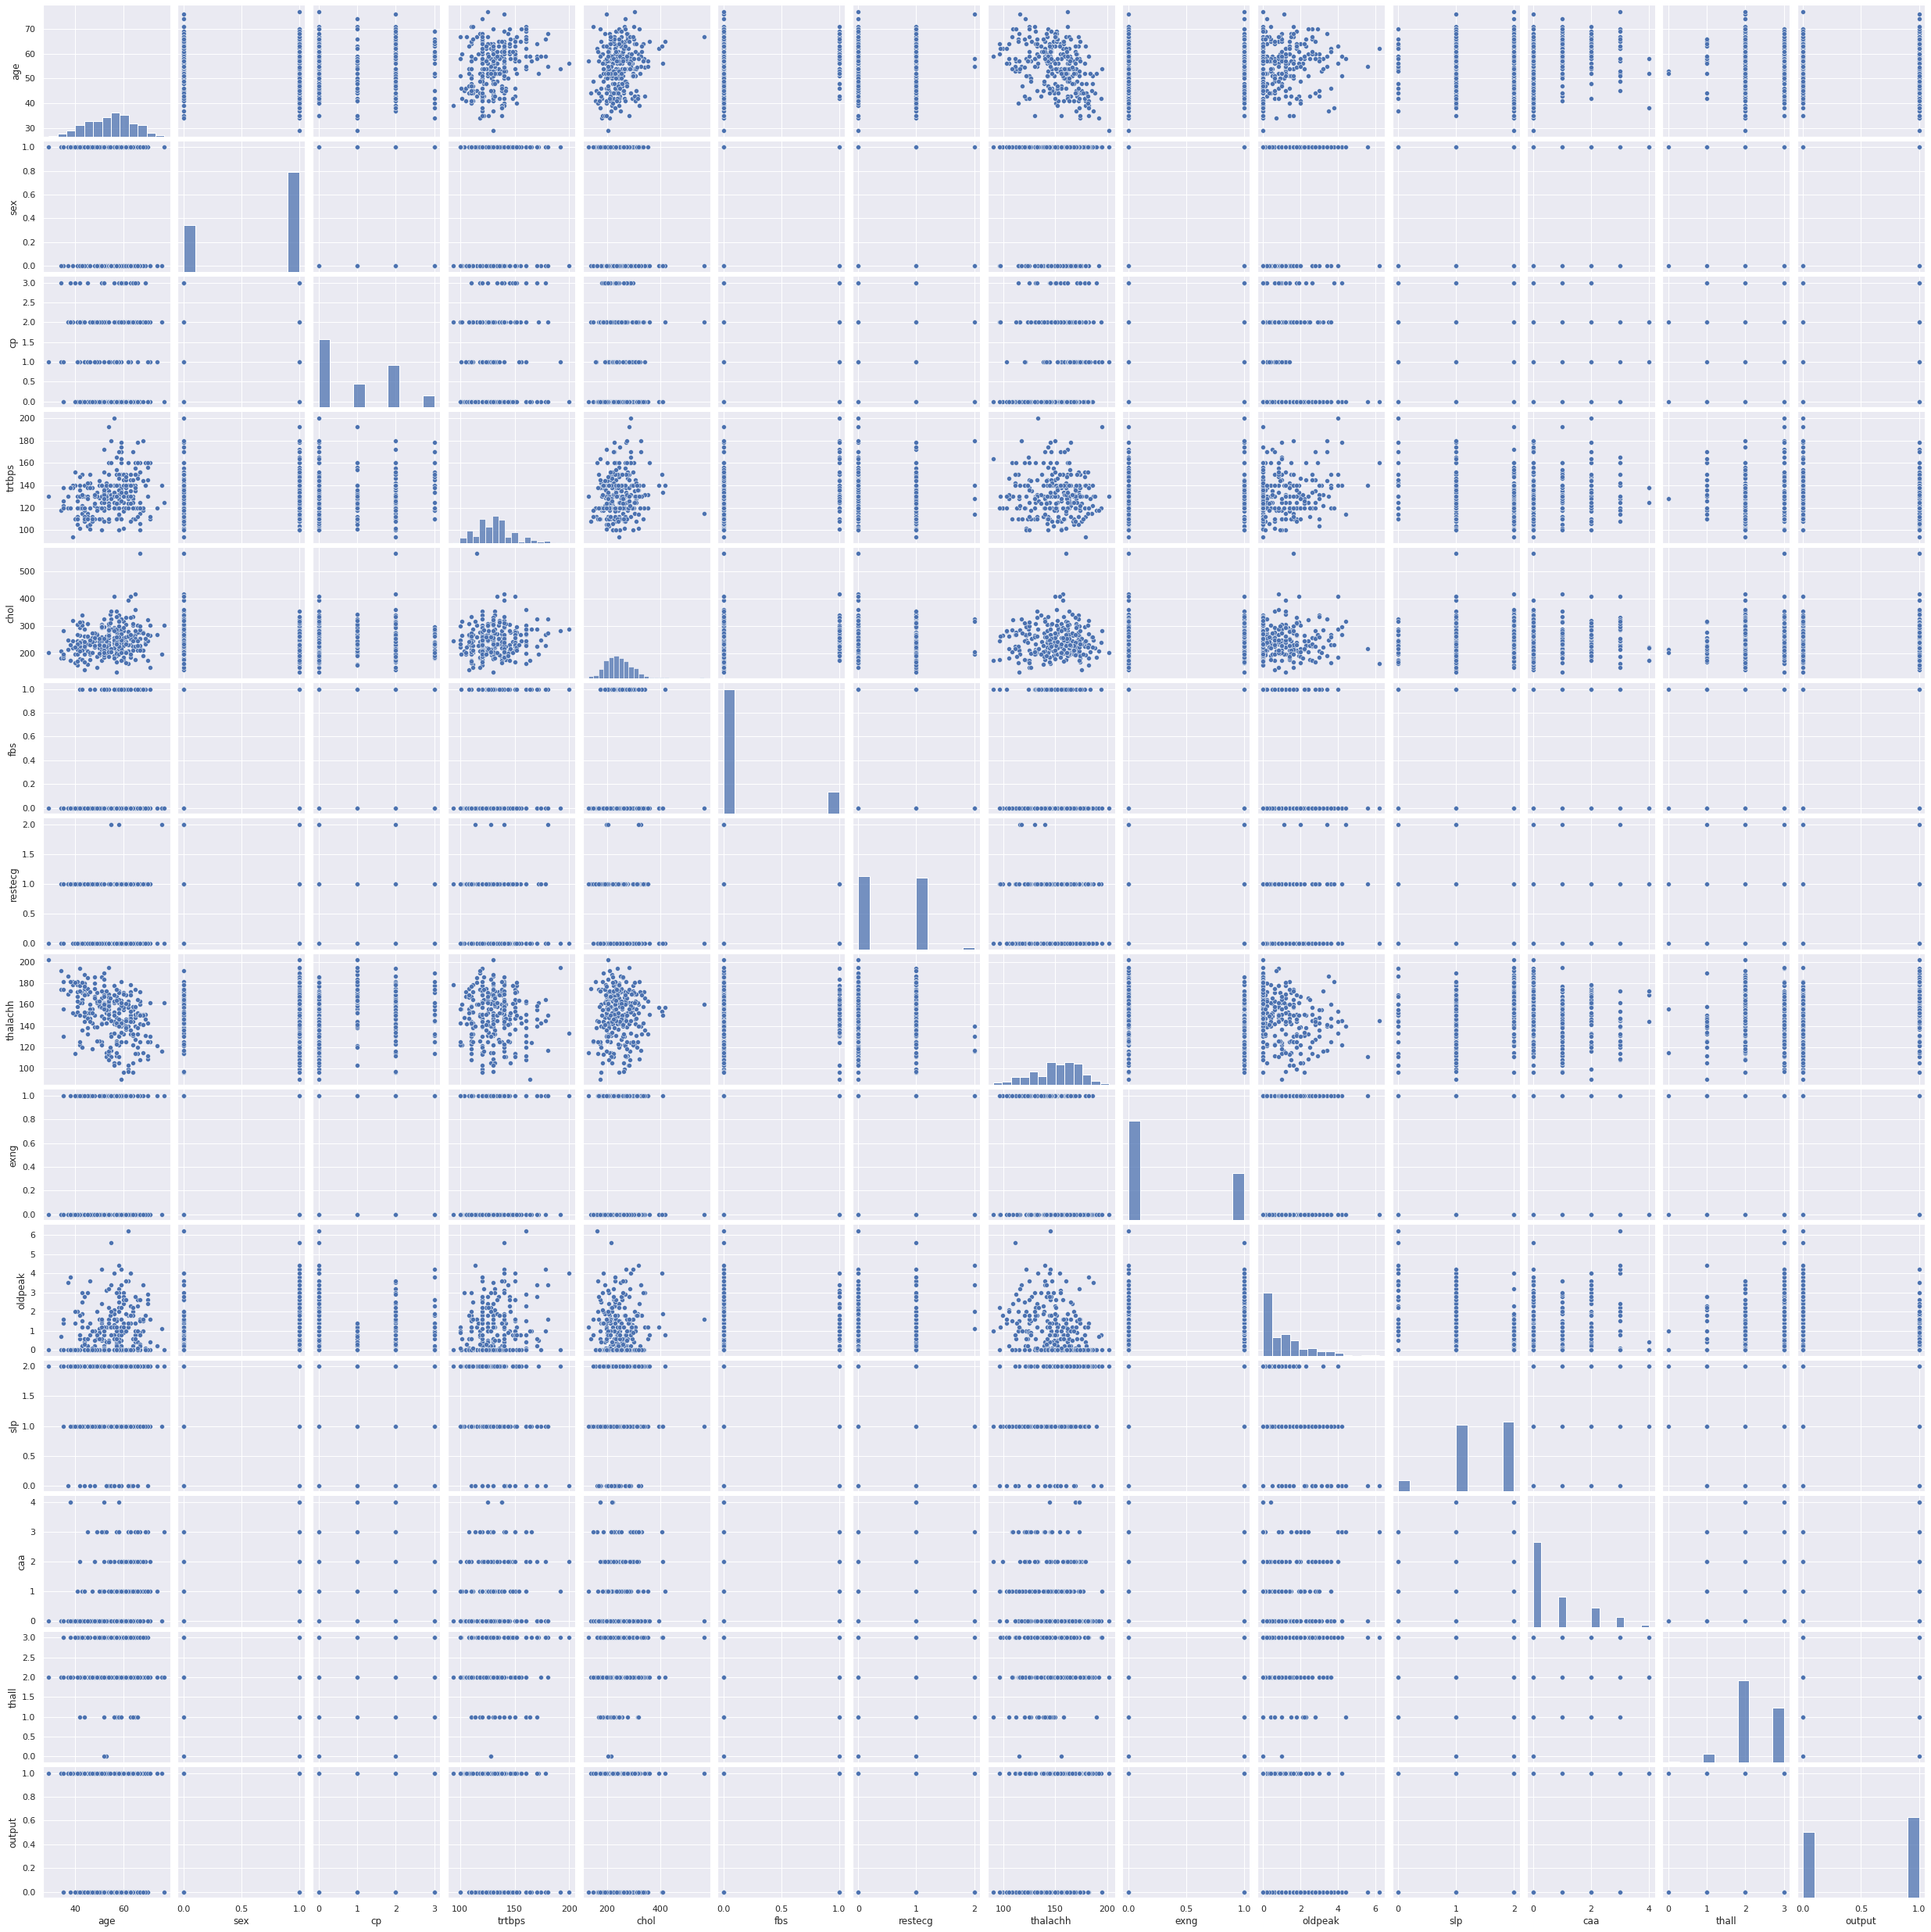

In [ ]:
sns.pairplot(df)

## Data Preprocessing

In [ ]:
df_new = df
X = df_new.drop(['output'], axis=1)
y = df_new[['output']]

Encoding Categorical data

In [ ]:
cat_var = [ 'sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
con_var = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

df_new = pd.get_dummies(df_new, columns = cat_var, drop_first = True)

Feature Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X[con_var] = scaler.fit_transform(X[con_var])

We use Robust Scaler beacause we have a few outliers in our continuous data and this scaler works best at scaling those outliers, hence removing the need for outlier handling.

In [ ]:
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.615385,1.0,3.0,0.75,-0.111111,1.0,0.0,-0.066667,0.0,0.9375,0.0,0.0,1.0
1,-1.384615,1.0,2.0,0.00,0.158730,0.0,1.0,1.166667,0.0,1.6875,0.0,0.0,2.0
3,0.076923,1.0,1.0,-0.50,-0.063492,0.0,1.0,0.866667,0.0,0.0000,2.0,0.0,2.0
4,0.153846,0.0,0.0,-0.50,1.809524,0.0,1.0,0.366667,1.0,-0.1250,2.0,0.0,2.0
5,0.153846,1.0,0.0,0.50,-0.761905,0.0,1.0,-0.133333,0.0,-0.2500,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.153846,0.0,0.0,0.50,0.015873,0.0,1.0,-0.966667,1.0,-0.3750,1.0,0.0,3.0
299,-0.769231,1.0,3.0,-1.00,0.380952,0.0,1.0,-0.666667,0.0,0.2500,1.0,0.0,3.0
300,1.000000,1.0,0.0,0.70,-0.746032,1.0,1.0,-0.366667,0.0,1.6250,1.0,2.0,3.0
301,0.153846,1.0,0.0,0.00,-1.730159,0.0,1.0,-1.233333,1.0,0.2500,1.0,1.0,3.0


Splitting data into test and train sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## SVM

Finding best parameters using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C':np.arange(1,10,1), 'gamma':[1, 0.1, 0.01, 0.001], 'kernel' : ['rbf', 'poly', 'sigmoid', 'linear']}
grid = GridSearchCV(estimator = SVC(), param_grid=param_grid, refit=True, verbose=4)
grid.fit(X_train, y_train)
print("Best Parameters: ",grid.best_params_)
print("Best Score: ", grid.best_score_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.756, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.756, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.711, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.659, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.773, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........... C=1, gamma=1, kernel=poly, score=0.822, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.886, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ......... C=1, gamma=0.1, kernel=poly, score=0.867, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ......... C=1, gamma=0.1, kernel=poly, score=0.733, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ......... C=1, gamma=0.1, kernel=poly, score=0.822, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ......... C=1, gamma=0.1, kernel=poly, score=0.818, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ......... C=1, gamma=0.1, kernel=poly, score=0.864, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=1, gamma=0.1, kernel=sigmoid, score=0.756, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.841, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.864, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.556, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.556, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.578, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.568, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.545, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ........ C=2, gamma=1, kernel=sigmoid, score=0.556, total=   0.0s
[CV] C=2, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=2, gamma=1, kernel=sigmoid, score=0.600, total=   0.0s
[CV] C=2, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=2, gamma=1, kernel=sigmoid, score=0.556, total=   0.0s
[CV] C=2, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=2, gamma=1, kernel=sigmoid, score=0.568, total=   0.0s
[CV] C=2, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=2, gamma=1, kernel=sigmoid, score=0.591, total=   0.0s
[CV] C=2, gamma=1, kernel=linear .....................................
[CV] ......... C=2, gamma=1, kernel=linear, score=0.800, total=   0.0s
[CV] C=2, gamma=1, kernel=linear .....................................
[CV] ......... C=2, gamma=1, kernel=linear, score=0.778, total=   0.0s
[CV] C=2, gamma=1, kernel=linear .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ......... C=2, gamma=0.01, kernel=rbf, score=0.886, total=   0.0s
[CV] C=2, gamma=0.01, kernel=poly ....................................
[CV] ........ C=2, gamma=0.01, kernel=poly, score=0.556, total=   0.0s
[CV] C=2, gamma=0.01, kernel=poly ....................................
[CV] ........ C=2, gamma=0.01, kernel=poly, score=0.556, total=   0.0s
[CV] C=2, gamma=0.01, kernel=poly ....................................
[CV] ........ C=2, gamma=0.01, kernel=poly, score=0.556, total=   0.0s
[CV] C=2, gamma=0.01, kernel=poly ....................................
[CV] ........ C=2, gamma=0.01, kernel=poly, score=0.545, total=   0.0s
[CV] C=2, gamma=0.01, kernel=poly ....................................
[CV] ........ C=2, gamma=0.01, kernel=poly, score=0.545, total=   0.0s
[CV] C=2, gamma=0.01, kernel=sigmoid .................................
[CV] ..... C=2, gamma=0.01, kernel=sigmoid, score=0.844, total=   0.0s
[CV] C=2, gamma=0.01, kernel=sigmoid .................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ......... C=3, gamma=0.1, kernel=poly, score=0.844, total=   0.0s
[CV] C=3, gamma=0.1, kernel=poly .....................................
[CV] ......... C=3, gamma=0.1, kernel=poly, score=0.733, total=   0.0s
[CV] C=3, gamma=0.1, kernel=poly .....................................
[CV] ......... C=3, gamma=0.1, kernel=poly, score=0.822, total=   0.0s
[CV] C=3, gamma=0.1, kernel=poly .....................................
[CV] ......... C=3, gamma=0.1, kernel=poly, score=0.795, total=   0.0s
[CV] C=3, gamma=0.1, kernel=poly .....................................
[CV] ......... C=3, gamma=0.1, kernel=poly, score=0.864, total=   0.0s
[CV] C=3, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=3, gamma=0.1, kernel=sigmoid, score=0.711, total=   0.0s
[CV] C=3, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=3, gamma=0.1, kernel=sigmoid, score=0.800, total=   0.0s
[CV] C=3, gamma=0.1, kernel=sigmoid ..................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ...... C=3, gamma=0.01, kernel=linear, score=0.864, total=   0.0s
[CV] C=3, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=3, gamma=0.001, kernel=rbf, score=0.800, total=   0.0s
[CV] C=3, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=3, gamma=0.001, kernel=rbf, score=0.822, total=   0.0s
[CV] C=3, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=3, gamma=0.001, kernel=rbf, score=0.822, total=   0.0s
[CV] C=3, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=3, gamma=0.001, kernel=rbf, score=0.795, total=   0.0s
[CV] C=3, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=3, gamma=0.001, kernel=rbf, score=0.818, total=   0.0s
[CV] C=3, gamma=0.001, kernel=poly ...................................
[CV] ....... C=3, gamma=0.001, kernel=poly, score=0.556, total=   0.0s
[CV] C=3, gamma=0.001, kernel=poly ...................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ........ C=4, gamma=1, kernel=sigmoid, score=0.578, total=   0.0s
[CV] C=4, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=4, gamma=1, kernel=sigmoid, score=0.578, total=   0.0s
[CV] C=4, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=4, gamma=1, kernel=sigmoid, score=0.614, total=   0.0s
[CV] C=4, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=4, gamma=1, kernel=sigmoid, score=0.591, total=   0.0s
[CV] C=4, gamma=1, kernel=linear .....................................
[CV] ......... C=4, gamma=1, kernel=linear, score=0.800, total=   0.0s
[CV] C=4, gamma=1, kernel=linear .....................................
[CV] ......... C=4, gamma=1, kernel=linear, score=0.778, total=   0.0s
[CV] C=4, gamma=1, kernel=linear .....................................
[CV] ......... C=4, gamma=1, kernel=linear, score=0.889, total=   0.0s
[CV] C=4, gamma=1, kernel=linear .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ....... C=4, gamma=0.1, kernel=linear, score=0.889, total=   0.0s
[CV] C=4, gamma=0.1, kernel=linear ...................................
[CV] ....... C=4, gamma=0.1, kernel=linear, score=0.841, total=   0.0s
[CV] C=4, gamma=0.1, kernel=linear ...................................
[CV] ....... C=4, gamma=0.1, kernel=linear, score=0.864, total=   0.0s
[CV] C=4, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=4, gamma=0.01, kernel=rbf, score=0.822, total=   0.0s
[CV] C=4, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=4, gamma=0.01, kernel=rbf, score=0.822, total=   0.0s
[CV] C=4, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=4, gamma=0.01, kernel=rbf, score=0.844, total=   0.0s
[CV] C=4, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=4, gamma=0.01, kernel=rbf, score=0.841, total=   0.0s
[CV] C=4, gamma=0.01, kernel=rbf .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ....... C=4, gamma=0.001, kernel=poly, score=0.556, total=   0.0s
[CV] C=4, gamma=0.001, kernel=poly ...................................
[CV] ....... C=4, gamma=0.001, kernel=poly, score=0.556, total=   0.0s
[CV] C=4, gamma=0.001, kernel=poly ...................................
[CV] ....... C=4, gamma=0.001, kernel=poly, score=0.545, total=   0.0s
[CV] C=4, gamma=0.001, kernel=poly ...................................
[CV] ....... C=4, gamma=0.001, kernel=poly, score=0.545, total=   0.0s
[CV] C=4, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=4, gamma=0.001, kernel=sigmoid, score=0.822, total=   0.0s
[CV] C=4, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=4, gamma=0.001, kernel=sigmoid, score=0.844, total=   0.0s
[CV] C=4, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=4, gamma=0.001, kernel=sigmoid, score=0.800, total=   0.0s
[CV] C=4, gamma=0.001, kernel=sigmoid ................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ........ C=5, gamma=1, kernel=sigmoid, score=0.591, total=   0.0s
[CV] C=5, gamma=1, kernel=linear .....................................
[CV] ......... C=5, gamma=1, kernel=linear, score=0.800, total=   0.0s
[CV] C=5, gamma=1, kernel=linear .....................................
[CV] ......... C=5, gamma=1, kernel=linear, score=0.778, total=   0.0s
[CV] C=5, gamma=1, kernel=linear .....................................
[CV] ......... C=5, gamma=1, kernel=linear, score=0.889, total=   0.0s
[CV] C=5, gamma=1, kernel=linear .....................................
[CV] ......... C=5, gamma=1, kernel=linear, score=0.841, total=   0.0s
[CV] C=5, gamma=1, kernel=linear .....................................
[CV] ......... C=5, gamma=1, kernel=linear, score=0.864, total=   0.0s
[CV] C=5, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=5, gamma=0.1, kernel=rbf, score=0.844, total=   0.0s
[CV] C=5, gamma=0.1, kernel=rbf ......................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ....... C=5, gamma=0.1, kernel=linear, score=0.889, total=   0.0s
[CV] C=5, gamma=0.1, kernel=linear ...................................
[CV] ....... C=5, gamma=0.1, kernel=linear, score=0.841, total=   0.0s
[CV] C=5, gamma=0.1, kernel=linear ...................................
[CV] ....... C=5, gamma=0.1, kernel=linear, score=0.864, total=   0.0s
[CV] C=5, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=5, gamma=0.01, kernel=rbf, score=0.800, total=   0.0s
[CV] C=5, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=5, gamma=0.01, kernel=rbf, score=0.822, total=   0.0s
[CV] C=5, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=5, gamma=0.01, kernel=rbf, score=0.867, total=   0.0s
[CV] C=5, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=5, gamma=0.01, kernel=rbf, score=0.841, total=   0.0s
[CV] C=5, gamma=0.01, kernel=rbf .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ....... C=5, gamma=0.001, kernel=poly, score=0.556, total=   0.0s
[CV] C=5, gamma=0.001, kernel=poly ...................................
[CV] ....... C=5, gamma=0.001, kernel=poly, score=0.556, total=   0.0s
[CV] C=5, gamma=0.001, kernel=poly ...................................
[CV] ....... C=5, gamma=0.001, kernel=poly, score=0.545, total=   0.0s
[CV] C=5, gamma=0.001, kernel=poly ...................................
[CV] ....... C=5, gamma=0.001, kernel=poly, score=0.545, total=   0.0s
[CV] C=5, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=5, gamma=0.001, kernel=sigmoid, score=0.800, total=   0.0s
[CV] C=5, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=5, gamma=0.001, kernel=sigmoid, score=0.844, total=   0.0s
[CV] C=5, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=5, gamma=0.001, kernel=sigmoid, score=0.822, total=   0.0s
[CV] C=5, gamma=0.001, kernel=sigmoid ................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ........ C=6, gamma=1, kernel=sigmoid, score=0.578, total=   0.0s
[CV] C=6, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=6, gamma=1, kernel=sigmoid, score=0.600, total=   0.0s
[CV] C=6, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=6, gamma=1, kernel=sigmoid, score=0.600, total=   0.0s
[CV] C=6, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=6, gamma=1, kernel=sigmoid, score=0.568, total=   0.0s
[CV] C=6, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=6, gamma=1, kernel=sigmoid, score=0.591, total=   0.0s
[CV] C=6, gamma=1, kernel=linear .....................................
[CV] ......... C=6, gamma=1, kernel=linear, score=0.800, total=   0.0s
[CV] C=6, gamma=1, kernel=linear .....................................
[CV] ......... C=6, gamma=1, kernel=linear, score=0.778, total=   0.0s
[CV] C=6, gamma=1, kernel=linear .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ....... C=6, gamma=0.1, kernel=linear, score=0.778, total=   0.0s
[CV] C=6, gamma=0.1, kernel=linear ...................................
[CV] ....... C=6, gamma=0.1, kernel=linear, score=0.889, total=   0.0s
[CV] C=6, gamma=0.1, kernel=linear ...................................
[CV] ....... C=6, gamma=0.1, kernel=linear, score=0.841, total=   0.0s
[CV] C=6, gamma=0.1, kernel=linear ...................................
[CV] ....... C=6, gamma=0.1, kernel=linear, score=0.864, total=   0.0s
[CV] C=6, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=6, gamma=0.01, kernel=rbf, score=0.800, total=   0.0s
[CV] C=6, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=6, gamma=0.01, kernel=rbf, score=0.822, total=   0.0s
[CV] C=6, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=6, gamma=0.01, kernel=rbf, score=0.867, total=   0.0s
[CV] C=6, gamma=0.01, kernel=rbf .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ........ C=6, gamma=0.001, kernel=rbf, score=0.841, total=   0.0s
[CV] C=6, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=6, gamma=0.001, kernel=rbf, score=0.886, total=   0.0s
[CV] C=6, gamma=0.001, kernel=poly ...................................
[CV] ....... C=6, gamma=0.001, kernel=poly, score=0.556, total=   0.0s
[CV] C=6, gamma=0.001, kernel=poly ...................................
[CV] ....... C=6, gamma=0.001, kernel=poly, score=0.556, total=   0.0s
[CV] C=6, gamma=0.001, kernel=poly ...................................
[CV] ....... C=6, gamma=0.001, kernel=poly, score=0.556, total=   0.0s
[CV] C=6, gamma=0.001, kernel=poly ...................................
[CV] ....... C=6, gamma=0.001, kernel=poly, score=0.545, total=   0.0s
[CV] C=6, gamma=0.001, kernel=poly ...................................
[CV] ....... C=6, gamma=0.001, kernel=poly, score=0.545, total=   0.0s
[CV] C=6, gamma=0.001, kernel=sigmoid ................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ........ C=7, gamma=1, kernel=sigmoid, score=0.600, total=   0.0s
[CV] C=7, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=7, gamma=1, kernel=sigmoid, score=0.600, total=   0.0s
[CV] C=7, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=7, gamma=1, kernel=sigmoid, score=0.568, total=   0.0s
[CV] C=7, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=7, gamma=1, kernel=sigmoid, score=0.591, total=   0.0s
[CV] C=7, gamma=1, kernel=linear .....................................
[CV] ......... C=7, gamma=1, kernel=linear, score=0.800, total=   0.0s
[CV] C=7, gamma=1, kernel=linear .....................................
[CV] ......... C=7, gamma=1, kernel=linear, score=0.778, total=   0.0s
[CV] C=7, gamma=1, kernel=linear .....................................
[CV] ......... C=7, gamma=1, kernel=linear, score=0.889, total=   0.0s
[CV] C=7, gamma=1, kernel=linear .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ....... C=7, gamma=0.1, kernel=linear, score=0.889, total=   0.0s
[CV] C=7, gamma=0.1, kernel=linear ...................................
[CV] ....... C=7, gamma=0.1, kernel=linear, score=0.841, total=   0.0s
[CV] C=7, gamma=0.1, kernel=linear ...................................
[CV] ....... C=7, gamma=0.1, kernel=linear, score=0.864, total=   0.0s
[CV] C=7, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=7, gamma=0.01, kernel=rbf, score=0.800, total=   0.0s
[CV] C=7, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=7, gamma=0.01, kernel=rbf, score=0.822, total=   0.0s
[CV] C=7, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=7, gamma=0.01, kernel=rbf, score=0.867, total=   0.0s
[CV] C=7, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=7, gamma=0.01, kernel=rbf, score=0.841, total=   0.0s
[CV] C=7, gamma=0.01, kernel=rbf .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ....... C=7, gamma=0.001, kernel=poly, score=0.556, total=   0.0s
[CV] C=7, gamma=0.001, kernel=poly ...................................
[CV] ....... C=7, gamma=0.001, kernel=poly, score=0.556, total=   0.0s
[CV] C=7, gamma=0.001, kernel=poly ...................................
[CV] ....... C=7, gamma=0.001, kernel=poly, score=0.556, total=   0.0s
[CV] C=7, gamma=0.001, kernel=poly ...................................
[CV] ....... C=7, gamma=0.001, kernel=poly, score=0.545, total=   0.0s
[CV] C=7, gamma=0.001, kernel=poly ...................................
[CV] ....... C=7, gamma=0.001, kernel=poly, score=0.545, total=   0.0s
[CV] C=7, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=7, gamma=0.001, kernel=sigmoid, score=0.778, total=   0.0s
[CV] C=7, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=7, gamma=0.001, kernel=sigmoid, score=0.822, total=   0.0s
[CV] C=7, gamma=0.001, kernel=sigmoid ................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ........ C=8, gamma=1, kernel=sigmoid, score=0.578, total=   0.0s
[CV] C=8, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=8, gamma=1, kernel=sigmoid, score=0.523, total=   0.0s
[CV] C=8, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=8, gamma=1, kernel=sigmoid, score=0.591, total=   0.0s
[CV] C=8, gamma=1, kernel=linear .....................................
[CV] ......... C=8, gamma=1, kernel=linear, score=0.800, total=   0.0s
[CV] C=8, gamma=1, kernel=linear .....................................
[CV] ......... C=8, gamma=1, kernel=linear, score=0.778, total=   0.0s
[CV] C=8, gamma=1, kernel=linear .....................................
[CV] ......... C=8, gamma=1, kernel=linear, score=0.889, total=   0.0s
[CV] C=8, gamma=1, kernel=linear .....................................
[CV] ......... C=8, gamma=1, kernel=linear, score=0.841, total=   0.0s
[CV] C=8, gamma=1, kernel=linear .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ....... C=8, gamma=0.1, kernel=linear, score=0.889, total=   0.0s
[CV] C=8, gamma=0.1, kernel=linear ...................................
[CV] ....... C=8, gamma=0.1, kernel=linear, score=0.841, total=   0.0s
[CV] C=8, gamma=0.1, kernel=linear ...................................
[CV] ....... C=8, gamma=0.1, kernel=linear, score=0.864, total=   0.0s
[CV] C=8, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=8, gamma=0.01, kernel=rbf, score=0.822, total=   0.0s
[CV] C=8, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=8, gamma=0.01, kernel=rbf, score=0.822, total=   0.0s
[CV] C=8, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=8, gamma=0.01, kernel=rbf, score=0.867, total=   0.0s
[CV] C=8, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=8, gamma=0.01, kernel=rbf, score=0.841, total=   0.0s
[CV] C=8, gamma=0.01, kernel=rbf .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ....... C=8, gamma=0.001, kernel=poly, score=0.556, total=   0.0s
[CV] C=8, gamma=0.001, kernel=poly ...................................
[CV] ....... C=8, gamma=0.001, kernel=poly, score=0.556, total=   0.0s
[CV] C=8, gamma=0.001, kernel=poly ...................................
[CV] ....... C=8, gamma=0.001, kernel=poly, score=0.556, total=   0.0s
[CV] C=8, gamma=0.001, kernel=poly ...................................
[CV] ....... C=8, gamma=0.001, kernel=poly, score=0.545, total=   0.0s
[CV] C=8, gamma=0.001, kernel=poly ...................................
[CV] ....... C=8, gamma=0.001, kernel=poly, score=0.545, total=   0.0s
[CV] C=8, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=8, gamma=0.001, kernel=sigmoid, score=0.800, total=   0.0s
[CV] C=8, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=8, gamma=0.001, kernel=sigmoid, score=0.822, total=   0.0s
[CV] C=8, gamma=0.001, kernel=sigmoid ................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ........ C=9, gamma=1, kernel=sigmoid, score=0.600, total=   0.0s
[CV] C=9, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=9, gamma=1, kernel=sigmoid, score=0.644, total=   0.0s
[CV] C=9, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=9, gamma=1, kernel=sigmoid, score=0.578, total=   0.0s
[CV] C=9, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=9, gamma=1, kernel=sigmoid, score=0.568, total=   0.0s
[CV] C=9, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=9, gamma=1, kernel=sigmoid, score=0.591, total=   0.0s
[CV] C=9, gamma=1, kernel=linear .....................................
[CV] ......... C=9, gamma=1, kernel=linear, score=0.800, total=   0.0s
[CV] C=9, gamma=1, kernel=linear .....................................
[CV] ......... C=9, gamma=1, kernel=linear, score=0.778, total=   0.0s
[CV] C=9, gamma=1, kernel=linear .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ....... C=9, gamma=0.1, kernel=linear, score=0.800, total=   0.0s
[CV] C=9, gamma=0.1, kernel=linear ...................................
[CV] ....... C=9, gamma=0.1, kernel=linear, score=0.778, total=   0.0s
[CV] C=9, gamma=0.1, kernel=linear ...................................
[CV] ....... C=9, gamma=0.1, kernel=linear, score=0.889, total=   0.0s
[CV] C=9, gamma=0.1, kernel=linear ...................................
[CV] ....... C=9, gamma=0.1, kernel=linear, score=0.841, total=   0.0s
[CV] C=9, gamma=0.1, kernel=linear ...................................
[CV] ....... C=9, gamma=0.1, kernel=linear, score=0.864, total=   0.0s
[CV] C=9, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=9, gamma=0.01, kernel=rbf, score=0.822, total=   0.0s
[CV] C=9, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=9, gamma=0.01, kernel=rbf, score=0.822, total=   0.0s
[CV] C=9, gamma=0.01, kernel=rbf .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ...... C=9, gamma=0.01, kernel=linear, score=0.864, total=   0.0s
[CV] C=9, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=9, gamma=0.001, kernel=rbf, score=0.844, total=   0.0s
[CV] C=9, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=9, gamma=0.001, kernel=rbf, score=0.800, total=   0.0s
[CV] C=9, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=9, gamma=0.001, kernel=rbf, score=0.844, total=   0.0s
[CV] C=9, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=9, gamma=0.001, kernel=rbf, score=0.818, total=   0.0s
[CV] C=9, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=9, gamma=0.001, kernel=rbf, score=0.886, total=   0.0s
[CV] C=9, gamma=0.001, kernel=poly ...................................
[CV] ....... C=9, gamma=0.001, kernel=poly, score=0.556, total=   0.0s
[CV] C=9, gamma=0.001, kernel=poly ...................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
y_pred = grid.predict(X_test)

Confusion Matrix (SVM)

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm_SVM = confusion_matrix(y_test, y_pred)
print(cm_SVM)
accuracy_score(y_test, y_pred)

[[18  8]
 [ 1 29]]


0.8392857142857143

ROC Curve (SVM)

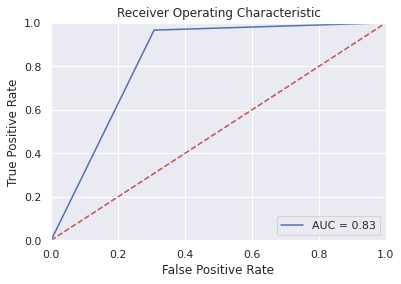

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Analysing various kernels and their results while keeping parameters constant (QUESTION 2)

RBF

In [ ]:
param_grid = {'C':np.arange(1,10,1), 'gamma':[1, 0.1, 0.01, 0.001], 'kernel' : ['rbf']}
grid = GridSearchCV(estimator = SVC(), param_grid=param_grid, refit=True, verbose=4)
grid.fit(X_train, y_train)
print("Best Parameters: ",grid.best_params_)
print("Best Score: ", grid.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.756, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.756, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.711, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.659, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.773, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.844, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

[CV] .......... C=2, gamma=0.1, kernel=rbf, score=0.841, total=   0.0s
[CV] C=2, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=2, gamma=0.1, kernel=rbf, score=0.886, total=   0.0s
[CV] C=2, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=2, gamma=0.01, kernel=rbf, score=0.822, total=   0.0s
[CV] C=2, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=2, gamma=0.01, kernel=rbf, score=0.800, total=   0.0s
[CV] C=2, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=2, gamma=0.01, kernel=rbf, score=0.844, total=   0.0s
[CV] C=2, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=2, gamma=0.01, kernel=rbf, score=0.841, total=   0.0s
[CV] C=2, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=2, gamma=0.01, kernel=rbf, score=0.886, total=   0.0s
[CV] C=2, gamma=0.001, kernel=rbf ....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ........ C=3, gamma=0.001, kernel=rbf, score=0.818, total=   0.0s
[CV] C=4, gamma=1, kernel=rbf ........................................
[CV] ............ C=4, gamma=1, kernel=rbf, score=0.800, total=   0.0s
[CV] C=4, gamma=1, kernel=rbf ........................................
[CV] ............ C=4, gamma=1, kernel=rbf, score=0.822, total=   0.0s
[CV] C=4, gamma=1, kernel=rbf ........................................
[CV] ............ C=4, gamma=1, kernel=rbf, score=0.689, total=   0.0s
[CV] C=4, gamma=1, kernel=rbf ........................................
[CV] ............ C=4, gamma=1, kernel=rbf, score=0.750, total=   0.0s
[CV] C=4, gamma=1, kernel=rbf ........................................
[CV] ............ C=4, gamma=1, kernel=rbf, score=0.727, total=   0.0s
[CV] C=4, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=4, gamma=0.1, kernel=rbf, score=0.867, total=   0.0s
[CV] C=4, gamma=0.1, kernel=rbf ......................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] .......... C=5, gamma=0.1, kernel=rbf, score=0.886, total=   0.0s
[CV] C=5, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=5, gamma=0.01, kernel=rbf, score=0.800, total=   0.0s
[CV] C=5, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=5, gamma=0.01, kernel=rbf, score=0.822, total=   0.0s
[CV] C=5, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=5, gamma=0.01, kernel=rbf, score=0.867, total=   0.0s
[CV] C=5, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=5, gamma=0.01, kernel=rbf, score=0.841, total=   0.0s
[CV] C=5, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=5, gamma=0.01, kernel=rbf, score=0.841, total=   0.0s
[CV] C=5, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=5, gamma=0.001, kernel=rbf, score=0.800, total=   0.0s
[CV] C=5, gamma=0.001, kernel=rbf ....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ............ C=7, gamma=1, kernel=rbf, score=0.822, total=   0.0s
[CV] C=7, gamma=1, kernel=rbf ........................................
[CV] ............ C=7, gamma=1, kernel=rbf, score=0.689, total=   0.0s
[CV] C=7, gamma=1, kernel=rbf ........................................
[CV] ............ C=7, gamma=1, kernel=rbf, score=0.750, total=   0.0s
[CV] C=7, gamma=1, kernel=rbf ........................................
[CV] ............ C=7, gamma=1, kernel=rbf, score=0.727, total=   0.0s
[CV] C=7, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=7, gamma=0.1, kernel=rbf, score=0.844, total=   0.0s
[CV] C=7, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=7, gamma=0.1, kernel=rbf, score=0.800, total=   0.0s
[CV] C=7, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=7, gamma=0.1, kernel=rbf, score=0.800, total=   0.0s
[CV] C=7, gamma=0.1, kernel=rbf ......................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ......... C=8, gamma=0.01, kernel=rbf, score=0.822, total=   0.0s
[CV] C=8, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=8, gamma=0.01, kernel=rbf, score=0.822, total=   0.0s
[CV] C=8, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=8, gamma=0.01, kernel=rbf, score=0.867, total=   0.0s
[CV] C=8, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=8, gamma=0.01, kernel=rbf, score=0.841, total=   0.0s
[CV] C=8, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=8, gamma=0.01, kernel=rbf, score=0.864, total=   0.0s
[CV] C=8, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=8, gamma=0.001, kernel=rbf, score=0.822, total=   0.0s
[CV] C=8, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=8, gamma=0.001, kernel=rbf, score=0.800, total=   0.0s
[CV] C=8, gamma=0.001, kernel=rbf ....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
y_pred1 = grid.predict(X_test)

In [ ]:
param_grid = {'C':np.arange(1,10,1), 'gamma':[1, 0.1, 0.01, 0.001], 'kernel' : ['linear']}
grid = GridSearchCV(estimator = SVC(), param_grid=param_grid, refit=True, verbose=4)
grid.fit(X_train, y_train)
print("Best Parameters: ",grid.best_params_)
print("Best Score: ", grid.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.800, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.778, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.889, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.841, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.864, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.800, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

[CV] ....... C=2, gamma=0.1, kernel=linear, score=0.864, total=   0.0s
[CV] C=2, gamma=0.01, kernel=linear ..................................
[CV] ...... C=2, gamma=0.01, kernel=linear, score=0.800, total=   0.0s
[CV] C=2, gamma=0.01, kernel=linear ..................................
[CV] ...... C=2, gamma=0.01, kernel=linear, score=0.778, total=   0.0s
[CV] C=2, gamma=0.01, kernel=linear ..................................
[CV] ...... C=2, gamma=0.01, kernel=linear, score=0.889, total=   0.0s
[CV] C=2, gamma=0.01, kernel=linear ..................................
[CV] ...... C=2, gamma=0.01, kernel=linear, score=0.841, total=   0.0s
[CV] C=2, gamma=0.01, kernel=linear ..................................
[CV] ...... C=2, gamma=0.01, kernel=linear, score=0.864, total=   0.0s
[CV] C=2, gamma=0.001, kernel=linear .................................
[CV] ..... C=2, gamma=0.001, kernel=linear, score=0.800, total=   0.0s
[CV] C=2, gamma=0.001, kernel=linear .................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ..... C=3, gamma=0.001, kernel=linear, score=0.889, total=   0.0s
[CV] C=3, gamma=0.001, kernel=linear .................................
[CV] ..... C=3, gamma=0.001, kernel=linear, score=0.841, total=   0.0s
[CV] C=3, gamma=0.001, kernel=linear .................................
[CV] ..... C=3, gamma=0.001, kernel=linear, score=0.864, total=   0.0s
[CV] C=4, gamma=1, kernel=linear .....................................
[CV] ......... C=4, gamma=1, kernel=linear, score=0.800, total=   0.0s
[CV] C=4, gamma=1, kernel=linear .....................................
[CV] ......... C=4, gamma=1, kernel=linear, score=0.778, total=   0.0s
[CV] C=4, gamma=1, kernel=linear .....................................
[CV] ......... C=4, gamma=1, kernel=linear, score=0.889, total=   0.0s
[CV] C=4, gamma=1, kernel=linear .....................................
[CV] ......... C=4, gamma=1, kernel=linear, score=0.841, total=   0.0s
[CV] C=4, gamma=1, kernel=linear .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ......... C=5, gamma=1, kernel=linear, score=0.800, total=   0.0s
[CV] C=5, gamma=1, kernel=linear .....................................
[CV] ......... C=5, gamma=1, kernel=linear, score=0.778, total=   0.0s
[CV] C=5, gamma=1, kernel=linear .....................................
[CV] ......... C=5, gamma=1, kernel=linear, score=0.889, total=   0.0s
[CV] C=5, gamma=1, kernel=linear .....................................
[CV] ......... C=5, gamma=1, kernel=linear, score=0.841, total=   0.0s
[CV] C=5, gamma=1, kernel=linear .....................................
[CV] ......... C=5, gamma=1, kernel=linear, score=0.864, total=   0.0s
[CV] C=5, gamma=0.1, kernel=linear ...................................
[CV] ....... C=5, gamma=0.1, kernel=linear, score=0.800, total=   0.0s
[CV] C=5, gamma=0.1, kernel=linear ...................................
[CV] ....... C=5, gamma=0.1, kernel=linear, score=0.778, total=   0.0s
[CV] C=5, gamma=0.1, kernel=linear ...................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ..... C=5, gamma=0.001, kernel=linear, score=0.841, total=   0.0s
[CV] C=5, gamma=0.001, kernel=linear .................................
[CV] ..... C=5, gamma=0.001, kernel=linear, score=0.864, total=   0.0s
[CV] C=6, gamma=1, kernel=linear .....................................
[CV] ......... C=6, gamma=1, kernel=linear, score=0.800, total=   0.0s
[CV] C=6, gamma=1, kernel=linear .....................................
[CV] ......... C=6, gamma=1, kernel=linear, score=0.778, total=   0.0s
[CV] C=6, gamma=1, kernel=linear .....................................
[CV] ......... C=6, gamma=1, kernel=linear, score=0.889, total=   0.0s
[CV] C=6, gamma=1, kernel=linear .....................................
[CV] ......... C=6, gamma=1, kernel=linear, score=0.841, total=   0.0s
[CV] C=6, gamma=1, kernel=linear .....................................
[CV] ......... C=6, gamma=1, kernel=linear, score=0.864, total=   0.0s
[CV] C=6, gamma=0.1, kernel=linear ...................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ..... C=6, gamma=0.001, kernel=linear, score=0.889, total=   0.0s
[CV] C=6, gamma=0.001, kernel=linear .................................
[CV] ..... C=6, gamma=0.001, kernel=linear, score=0.841, total=   0.0s
[CV] C=6, gamma=0.001, kernel=linear .................................
[CV] ..... C=6, gamma=0.001, kernel=linear, score=0.864, total=   0.0s
[CV] C=7, gamma=1, kernel=linear .....................................
[CV] ......... C=7, gamma=1, kernel=linear, score=0.800, total=   0.0s
[CV] C=7, gamma=1, kernel=linear .....................................
[CV] ......... C=7, gamma=1, kernel=linear, score=0.778, total=   0.0s
[CV] C=7, gamma=1, kernel=linear .....................................
[CV] ......... C=7, gamma=1, kernel=linear, score=0.889, total=   0.0s
[CV] C=7, gamma=1, kernel=linear .....................................
[CV] ......... C=7, gamma=1, kernel=linear, score=0.841, total=   0.0s
[CV] C=7, gamma=1, kernel=linear .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ..... C=7, gamma=0.001, kernel=linear, score=0.889, total=   0.0s
[CV] C=7, gamma=0.001, kernel=linear .................................
[CV] ..... C=7, gamma=0.001, kernel=linear, score=0.841, total=   0.0s
[CV] C=7, gamma=0.001, kernel=linear .................................
[CV] ..... C=7, gamma=0.001, kernel=linear, score=0.864, total=   0.0s
[CV] C=8, gamma=1, kernel=linear .....................................
[CV] ......... C=8, gamma=1, kernel=linear, score=0.800, total=   0.0s
[CV] C=8, gamma=1, kernel=linear .....................................
[CV] ......... C=8, gamma=1, kernel=linear, score=0.778, total=   0.0s
[CV] C=8, gamma=1, kernel=linear .....................................
[CV] ......... C=8, gamma=1, kernel=linear, score=0.889, total=   0.0s
[CV] C=8, gamma=1, kernel=linear .....................................
[CV] ......... C=8, gamma=1, kernel=linear, score=0.841, total=   0.0s
[CV] C=8, gamma=1, kernel=linear .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ..... C=8, gamma=0.001, kernel=linear, score=0.778, total=   0.0s
[CV] C=8, gamma=0.001, kernel=linear .................................
[CV] ..... C=8, gamma=0.001, kernel=linear, score=0.889, total=   0.0s
[CV] C=8, gamma=0.001, kernel=linear .................................
[CV] ..... C=8, gamma=0.001, kernel=linear, score=0.841, total=   0.0s
[CV] C=8, gamma=0.001, kernel=linear .................................
[CV] ..... C=8, gamma=0.001, kernel=linear, score=0.864, total=   0.0s
[CV] C=9, gamma=1, kernel=linear .....................................
[CV] ......... C=9, gamma=1, kernel=linear, score=0.800, total=   0.0s
[CV] C=9, gamma=1, kernel=linear .....................................
[CV] ......... C=9, gamma=1, kernel=linear, score=0.778, total=   0.0s
[CV] C=9, gamma=1, kernel=linear .....................................
[CV] ......... C=9, gamma=1, kernel=linear, score=0.889, total=   0.0s
[CV] C=9, gamma=1, kernel=linear .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ...... C=9, gamma=0.01, kernel=linear, score=0.841, total=   0.0s
[CV] C=9, gamma=0.01, kernel=linear ..................................
[CV] ...... C=9, gamma=0.01, kernel=linear, score=0.864, total=   0.0s
[CV] C=9, gamma=0.001, kernel=linear .................................
[CV] ..... C=9, gamma=0.001, kernel=linear, score=0.800, total=   0.0s
[CV] C=9, gamma=0.001, kernel=linear .................................
[CV] ..... C=9, gamma=0.001, kernel=linear, score=0.778, total=   0.0s
[CV] C=9, gamma=0.001, kernel=linear .................................
[CV] ..... C=9, gamma=0.001, kernel=linear, score=0.889, total=   0.0s
[CV] C=9, gamma=0.001, kernel=linear .................................
[CV] ..... C=9, gamma=0.001, kernel=linear, score=0.841, total=   0.0s
[CV] C=9, gamma=0.001, kernel=linear .................................
[CV] ..... C=9, gamma=0.001, kernel=linear, score=0.864, total=   0.0s
Best Parameters:  {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Best Score:  0.834

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
y_pred2 = grid.predict(X_test)

In [ ]:
param_grid = {'C':np.arange(1,10,1), 'gamma':[1, 0.1, 0.01, 0.001], 'kernel' : ['sigmoid']}
grid = GridSearchCV(estimator = SVC(), param_grid=param_grid, refit=True, verbose=4)
grid.fit(X_train, y_train)
print("Best Parameters: ",grid.best_params_)
print("Best Score: ", grid.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=1, gamma=1, kernel=sigmoid, score=0.578, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=1, gamma=1, kernel=sigmoid, score=0.578, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=1, gamma=1, kernel=sigmoid, score=0.533, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=1, gamma=1, kernel=sigmoid, score=0.568, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=1, gamma=1, kernel=sigmoid, score=0.568, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=1, gamma=0.1, kernel=sigmoid, score=0.756, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

[CV] ..... C=1, gamma=0.01, kernel=sigmoid, score=0.818, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] ..... C=1, gamma=0.01, kernel=sigmoid, score=0.864, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.556, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.556, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.556, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.545, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.545, total=   0.0s
[CV] C=2, gamma=1, kernel=sigmoid ....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ...... C=2, gamma=0.1, kernel=sigmoid, score=0.822, total=   0.0s
[CV] C=2, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=2, gamma=0.1, kernel=sigmoid, score=0.773, total=   0.0s
[CV] C=2, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=2, gamma=0.1, kernel=sigmoid, score=0.841, total=   0.0s
[CV] C=2, gamma=0.01, kernel=sigmoid .................................
[CV] ..... C=2, gamma=0.01, kernel=sigmoid, score=0.844, total=   0.0s
[CV] C=2, gamma=0.01, kernel=sigmoid .................................
[CV] ..... C=2, gamma=0.01, kernel=sigmoid, score=0.800, total=   0.0s
[CV] C=2, gamma=0.01, kernel=sigmoid .................................
[CV] ..... C=2, gamma=0.01, kernel=sigmoid, score=0.844, total=   0.0s
[CV] C=2, gamma=0.01, kernel=sigmoid .................................
[CV] ..... C=2, gamma=0.01, kernel=sigmoid, score=0.841, total=   0.0s
[CV] C=2, gamma=0.01, kernel=sigmoid .................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ........ C=3, gamma=1, kernel=sigmoid, score=0.614, total=   0.0s
[CV] C=3, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=3, gamma=1, kernel=sigmoid, score=0.591, total=   0.0s
[CV] C=3, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=3, gamma=0.1, kernel=sigmoid, score=0.711, total=   0.0s
[CV] C=3, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=3, gamma=0.1, kernel=sigmoid, score=0.800, total=   0.0s
[CV] C=3, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=3, gamma=0.1, kernel=sigmoid, score=0.844, total=   0.0s
[CV] C=3, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=3, gamma=0.1, kernel=sigmoid, score=0.795, total=   0.0s
[CV] C=3, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=3, gamma=0.1, kernel=sigmoid, score=0.864, total=   0.0s
[CV] C=3, gamma=0.01, kernel=sigmoid .................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] .... C=3, gamma=0.001, kernel=sigmoid, score=0.750, total=   0.0s
[CV] C=4, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=4, gamma=1, kernel=sigmoid, score=0.467, total=   0.0s
[CV] C=4, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=4, gamma=1, kernel=sigmoid, score=0.578, total=   0.0s
[CV] C=4, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=4, gamma=1, kernel=sigmoid, score=0.578, total=   0.0s
[CV] C=4, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=4, gamma=1, kernel=sigmoid, score=0.614, total=   0.0s
[CV] C=4, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=4, gamma=1, kernel=sigmoid, score=0.591, total=   0.0s
[CV] C=4, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=4, gamma=0.1, kernel=sigmoid, score=0.778, total=   0.0s
[CV] C=4, gamma=0.1, kernel=sigmoid ..................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] .... C=4, gamma=0.001, kernel=sigmoid, score=0.822, total=   0.0s
[CV] C=4, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=4, gamma=0.001, kernel=sigmoid, score=0.844, total=   0.0s
[CV] C=4, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=4, gamma=0.001, kernel=sigmoid, score=0.800, total=   0.0s
[CV] C=4, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=4, gamma=0.001, kernel=sigmoid, score=0.750, total=   0.0s
[CV] C=4, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=4, gamma=0.001, kernel=sigmoid, score=0.773, total=   0.0s
[CV] C=5, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=5, gamma=1, kernel=sigmoid, score=0.489, total=   0.0s
[CV] C=5, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=5, gamma=1, kernel=sigmoid, score=0.600, total=   0.0s
[CV] C=5, gamma=1, kernel=sigmoid ....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ..... C=5, gamma=0.01, kernel=sigmoid, score=0.822, total=   0.0s
[CV] C=5, gamma=0.01, kernel=sigmoid .................................
[CV] ..... C=5, gamma=0.01, kernel=sigmoid, score=0.822, total=   0.0s
[CV] C=5, gamma=0.01, kernel=sigmoid .................................
[CV] ..... C=5, gamma=0.01, kernel=sigmoid, score=0.844, total=   0.0s
[CV] C=5, gamma=0.01, kernel=sigmoid .................................
[CV] ..... C=5, gamma=0.01, kernel=sigmoid, score=0.841, total=   0.0s
[CV] C=5, gamma=0.01, kernel=sigmoid .................................
[CV] ..... C=5, gamma=0.01, kernel=sigmoid, score=0.886, total=   0.0s
[CV] C=5, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=5, gamma=0.001, kernel=sigmoid, score=0.800, total=   0.0s
[CV] C=5, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=5, gamma=0.001, kernel=sigmoid, score=0.844, total=   0.0s
[CV] C=5, gamma=0.001, kernel=sigmoid ................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ........ C=6, gamma=1, kernel=sigmoid, score=0.591, total=   0.0s
[CV] C=6, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=6, gamma=0.1, kernel=sigmoid, score=0.667, total=   0.0s
[CV] C=6, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=6, gamma=0.1, kernel=sigmoid, score=0.800, total=   0.0s
[CV] C=6, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=6, gamma=0.1, kernel=sigmoid, score=0.867, total=   0.0s
[CV] C=6, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=6, gamma=0.1, kernel=sigmoid, score=0.795, total=   0.0s
[CV] C=6, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=6, gamma=0.1, kernel=sigmoid, score=0.886, total=   0.0s
[CV] C=6, gamma=0.01, kernel=sigmoid .................................
[CV] ..... C=6, gamma=0.01, kernel=sigmoid, score=0.844, total=   0.0s
[CV] C=6, gamma=0.01, kernel=sigmoid .................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] .... C=6, gamma=0.001, kernel=sigmoid, score=0.795, total=   0.0s
[CV] C=6, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=6, gamma=0.001, kernel=sigmoid, score=0.818, total=   0.0s
[CV] C=7, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=7, gamma=1, kernel=sigmoid, score=0.600, total=   0.0s
[CV] C=7, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=7, gamma=1, kernel=sigmoid, score=0.600, total=   0.0s
[CV] C=7, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=7, gamma=1, kernel=sigmoid, score=0.600, total=   0.0s
[CV] C=7, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=7, gamma=1, kernel=sigmoid, score=0.568, total=   0.0s
[CV] C=7, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=7, gamma=1, kernel=sigmoid, score=0.591, total=   0.0s
[CV] C=7, gamma=0.1, kernel=sigmoid ..................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] .... C=7, gamma=0.001, kernel=sigmoid, score=0.778, total=   0.0s
[CV] C=7, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=7, gamma=0.001, kernel=sigmoid, score=0.822, total=   0.0s
[CV] C=7, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=7, gamma=0.001, kernel=sigmoid, score=0.822, total=   0.0s
[CV] C=7, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=7, gamma=0.001, kernel=sigmoid, score=0.818, total=   0.0s
[CV] C=7, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=7, gamma=0.001, kernel=sigmoid, score=0.818, total=   0.0s
[CV] C=8, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=8, gamma=1, kernel=sigmoid, score=0.578, total=   0.0s
[CV] C=8, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=8, gamma=1, kernel=sigmoid, score=0.622, total=   0.0s
[CV] C=8, gamma=1, kernel=sigmoid ....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ...... C=8, gamma=0.1, kernel=sigmoid, score=0.864, total=   0.0s
[CV] C=8, gamma=0.01, kernel=sigmoid .................................
[CV] ..... C=8, gamma=0.01, kernel=sigmoid, score=0.778, total=   0.0s
[CV] C=8, gamma=0.01, kernel=sigmoid .................................
[CV] ..... C=8, gamma=0.01, kernel=sigmoid, score=0.800, total=   0.0s
[CV] C=8, gamma=0.01, kernel=sigmoid .................................
[CV] ..... C=8, gamma=0.01, kernel=sigmoid, score=0.867, total=   0.0s
[CV] C=8, gamma=0.01, kernel=sigmoid .................................
[CV] ..... C=8, gamma=0.01, kernel=sigmoid, score=0.841, total=   0.0s
[CV] C=8, gamma=0.01, kernel=sigmoid .................................
[CV] ..... C=8, gamma=0.01, kernel=sigmoid, score=0.864, total=   0.0s
[CV] C=8, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=8, gamma=0.001, kernel=sigmoid, score=0.800, total=   0.0s
[CV] C=8, gamma=0.001, kernel=sigmoid ................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ...... C=9, gamma=0.1, kernel=sigmoid, score=0.667, total=   0.0s
[CV] C=9, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=9, gamma=0.1, kernel=sigmoid, score=0.778, total=   0.0s
[CV] C=9, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=9, gamma=0.1, kernel=sigmoid, score=0.822, total=   0.0s
[CV] C=9, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=9, gamma=0.1, kernel=sigmoid, score=0.750, total=   0.0s
[CV] C=9, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=9, gamma=0.1, kernel=sigmoid, score=0.864, total=   0.0s
[CV] C=9, gamma=0.01, kernel=sigmoid .................................
[CV] ..... C=9, gamma=0.01, kernel=sigmoid, score=0.800, total=   0.0s
[CV] C=9, gamma=0.01, kernel=sigmoid .................................
[CV] ..... C=9, gamma=0.01, kernel=sigmoid, score=0.800, total=   0.0s
[CV] C=9, gamma=0.01, kernel=sigmoid .................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
y_pred3 = grid.predict(X_test)

In [ ]:
param_grid = {'C':np.arange(1,10,1), 'gamma':[1, 0.1, 0.01, 0.001], 'kernel' : ['poly']}
grid = GridSearchCV(estimator = SVC(), param_grid=param_grid, refit=True, verbose=4)
grid.fit(X_train, y_train)
print("Best Parameters: ",grid.best_params_)
print("Best Score: ", grid.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........... C=1, gamma=1, kernel=poly, score=0.822, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........... C=1, gamma=1, kernel=poly, score=0.756, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........... C=1, gamma=1, kernel=poly, score=0.800, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........... C=1, gamma=1, kernel=poly, score=0.750, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........... C=1, gamma=1, kernel=poly, score=0.841, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ......... C=1, gamma=0.1, kernel=poly, score=0.867, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ......... 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

[CV] ......... C=1, gamma=0.1, kernel=poly, score=0.864, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ........ C=1, gamma=0.01, kernel=poly, score=0.556, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ........ C=1, gamma=0.01, kernel=poly, score=0.556, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ........ C=1, gamma=0.01, kernel=poly, score=0.556, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ........ C=1, gamma=0.01, kernel=poly, score=0.545, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ........ C=1, gamma=0.01, kernel=poly, score=0.545, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] ....... C=1, gamma=0.001, kernel=poly, score=0.556, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ......... C=2, gamma=0.1, kernel=poly, score=0.864, total=   0.0s
[CV] C=2, gamma=0.01, kernel=poly ....................................
[CV] ........ C=2, gamma=0.01, kernel=poly, score=0.556, total=   0.0s
[CV] C=2, gamma=0.01, kernel=poly ....................................
[CV] ........ C=2, gamma=0.01, kernel=poly, score=0.556, total=   0.0s
[CV] C=2, gamma=0.01, kernel=poly ....................................
[CV] ........ C=2, gamma=0.01, kernel=poly, score=0.556, total=   0.0s
[CV] C=2, gamma=0.01, kernel=poly ....................................
[CV] ........ C=2, gamma=0.01, kernel=poly, score=0.545, total=   0.0s
[CV] C=2, gamma=0.01, kernel=poly ....................................
[CV] ........ C=2, gamma=0.01, kernel=poly, score=0.545, total=   0.0s
[CV] C=2, gamma=0.001, kernel=poly ...................................
[CV] ....... C=2, gamma=0.001, kernel=poly, score=0.556, total=   0.0s
[CV] C=2, gamma=0.001, kernel=poly ...................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ........... C=3, gamma=1, kernel=poly, score=0.822, total=   0.0s
[CV] C=3, gamma=1, kernel=poly .......................................
[CV] ........... C=3, gamma=1, kernel=poly, score=0.756, total=   0.0s
[CV] C=3, gamma=1, kernel=poly .......................................
[CV] ........... C=3, gamma=1, kernel=poly, score=0.800, total=   0.0s
[CV] C=3, gamma=1, kernel=poly .......................................
[CV] ........... C=3, gamma=1, kernel=poly, score=0.750, total=   0.0s
[CV] C=3, gamma=1, kernel=poly .......................................
[CV] ........... C=3, gamma=1, kernel=poly, score=0.841, total=   0.0s
[CV] C=3, gamma=0.1, kernel=poly .....................................
[CV] ......... C=3, gamma=0.1, kernel=poly, score=0.844, total=   0.0s
[CV] C=3, gamma=0.1, kernel=poly .....................................
[CV] ......... C=3, gamma=0.1, kernel=poly, score=0.733, total=   0.0s
[CV] C=3, gamma=0.1, kernel=poly .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ........... C=4, gamma=1, kernel=poly, score=0.822, total=   0.0s
[CV] C=4, gamma=1, kernel=poly .......................................
[CV] ........... C=4, gamma=1, kernel=poly, score=0.756, total=   0.0s
[CV] C=4, gamma=1, kernel=poly .......................................
[CV] ........... C=4, gamma=1, kernel=poly, score=0.800, total=   0.0s
[CV] C=4, gamma=1, kernel=poly .......................................
[CV] ........... C=4, gamma=1, kernel=poly, score=0.750, total=   0.0s
[CV] C=4, gamma=1, kernel=poly .......................................
[CV] ........... C=4, gamma=1, kernel=poly, score=0.841, total=   0.0s
[CV] C=4, gamma=0.1, kernel=poly .....................................
[CV] ......... C=4, gamma=0.1, kernel=poly, score=0.844, total=   0.0s
[CV] C=4, gamma=0.1, kernel=poly .....................................
[CV] ......... C=4, gamma=0.1, kernel=poly, score=0.756, total=   0.0s
[CV] C=4, gamma=0.1, kernel=poly .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ........ C=4, gamma=0.01, kernel=poly, score=0.556, total=   0.0s
[CV] C=4, gamma=0.01, kernel=poly ....................................
[CV] ........ C=4, gamma=0.01, kernel=poly, score=0.556, total=   0.0s
[CV] C=4, gamma=0.01, kernel=poly ....................................
[CV] ........ C=4, gamma=0.01, kernel=poly, score=0.556, total=   0.0s
[CV] C=4, gamma=0.01, kernel=poly ....................................
[CV] ........ C=4, gamma=0.01, kernel=poly, score=0.545, total=   0.0s
[CV] C=4, gamma=0.01, kernel=poly ....................................
[CV] ........ C=4, gamma=0.01, kernel=poly, score=0.545, total=   0.0s
[CV] C=4, gamma=0.001, kernel=poly ...................................
[CV] ....... C=4, gamma=0.001, kernel=poly, score=0.556, total=   0.0s
[CV] C=4, gamma=0.001, kernel=poly ...................................
[CV] ....... C=4, gamma=0.001, kernel=poly, score=0.556, total=   0.0s
[CV] C=4, gamma=0.001, kernel=poly ...................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ........ C=5, gamma=0.01, kernel=poly, score=0.556, total=   0.0s
[CV] C=5, gamma=0.01, kernel=poly ....................................
[CV] ........ C=5, gamma=0.01, kernel=poly, score=0.556, total=   0.0s
[CV] C=5, gamma=0.01, kernel=poly ....................................
[CV] ........ C=5, gamma=0.01, kernel=poly, score=0.556, total=   0.0s
[CV] C=5, gamma=0.01, kernel=poly ....................................
[CV] ........ C=5, gamma=0.01, kernel=poly, score=0.568, total=   0.0s
[CV] C=5, gamma=0.01, kernel=poly ....................................
[CV] ........ C=5, gamma=0.01, kernel=poly, score=0.545, total=   0.0s
[CV] C=5, gamma=0.001, kernel=poly ...................................
[CV] ....... C=5, gamma=0.001, kernel=poly, score=0.556, total=   0.0s
[CV] C=5, gamma=0.001, kernel=poly ...................................
[CV] ....... C=5, gamma=0.001, kernel=poly, score=0.556, total=   0.0s
[CV] C=5, gamma=0.001, kernel=poly ...................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ........... C=6, gamma=1, kernel=poly, score=0.756, total=   0.0s
[CV] C=6, gamma=1, kernel=poly .......................................
[CV] ........... C=6, gamma=1, kernel=poly, score=0.800, total=   0.0s
[CV] C=6, gamma=1, kernel=poly .......................................
[CV] ........... C=6, gamma=1, kernel=poly, score=0.750, total=   0.0s
[CV] C=6, gamma=1, kernel=poly .......................................
[CV] ........... C=6, gamma=1, kernel=poly, score=0.841, total=   0.0s
[CV] C=6, gamma=0.1, kernel=poly .....................................
[CV] ......... C=6, gamma=0.1, kernel=poly, score=0.822, total=   0.0s
[CV] C=6, gamma=0.1, kernel=poly .....................................
[CV] ......... C=6, gamma=0.1, kernel=poly, score=0.778, total=   0.0s
[CV] C=6, gamma=0.1, kernel=poly .....................................
[CV] ......... C=6, gamma=0.1, kernel=poly, score=0.822, total=   0.0s
[CV] C=6, gamma=0.1, kernel=poly .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ........... C=7, gamma=1, kernel=poly, score=0.800, total=   0.0s
[CV] C=7, gamma=1, kernel=poly .......................................
[CV] ........... C=7, gamma=1, kernel=poly, score=0.750, total=   0.0s
[CV] C=7, gamma=1, kernel=poly .......................................
[CV] ........... C=7, gamma=1, kernel=poly, score=0.841, total=   0.0s
[CV] C=7, gamma=0.1, kernel=poly .....................................
[CV] ......... C=7, gamma=0.1, kernel=poly, score=0.822, total=   0.0s
[CV] C=7, gamma=0.1, kernel=poly .....................................
[CV] ......... C=7, gamma=0.1, kernel=poly, score=0.756, total=   0.0s
[CV] C=7, gamma=0.1, kernel=poly .....................................
[CV] ......... C=7, gamma=0.1, kernel=poly, score=0.800, total=   0.0s
[CV] C=7, gamma=0.1, kernel=poly .....................................
[CV] ......... C=7, gamma=0.1, kernel=poly, score=0.750, total=   0.0s
[CV] C=7, gamma=0.1, kernel=poly .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ........ C=7, gamma=0.01, kernel=poly, score=0.578, total=   0.0s
[CV] C=7, gamma=0.01, kernel=poly ....................................
[CV] ........ C=7, gamma=0.01, kernel=poly, score=0.578, total=   0.0s
[CV] C=7, gamma=0.01, kernel=poly ....................................
[CV] ........ C=7, gamma=0.01, kernel=poly, score=0.614, total=   0.0s
[CV] C=7, gamma=0.01, kernel=poly ....................................
[CV] ........ C=7, gamma=0.01, kernel=poly, score=0.568, total=   0.0s
[CV] C=7, gamma=0.001, kernel=poly ...................................
[CV] ....... C=7, gamma=0.001, kernel=poly, score=0.556, total=   0.0s
[CV] C=7, gamma=0.001, kernel=poly ...................................
[CV] ....... C=7, gamma=0.001, kernel=poly, score=0.556, total=   0.0s
[CV] C=7, gamma=0.001, kernel=poly ...................................
[CV] ....... C=7, gamma=0.001, kernel=poly, score=0.556, total=   0.0s
[CV] C=7, gamma=0.001, kernel=poly ...................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ........ C=8, gamma=0.01, kernel=poly, score=0.622, total=   0.0s
[CV] C=8, gamma=0.01, kernel=poly ....................................
[CV] ........ C=8, gamma=0.01, kernel=poly, score=0.659, total=   0.0s
[CV] C=8, gamma=0.01, kernel=poly ....................................
[CV] ........ C=8, gamma=0.01, kernel=poly, score=0.591, total=   0.0s
[CV] C=8, gamma=0.001, kernel=poly ...................................
[CV] ....... C=8, gamma=0.001, kernel=poly, score=0.556, total=   0.0s
[CV] C=8, gamma=0.001, kernel=poly ...................................
[CV] ....... C=8, gamma=0.001, kernel=poly, score=0.556, total=   0.0s
[CV] C=8, gamma=0.001, kernel=poly ...................................
[CV] ....... C=8, gamma=0.001, kernel=poly, score=0.556, total=   0.0s
[CV] C=8, gamma=0.001, kernel=poly ...................................
[CV] ....... C=8, gamma=0.001, kernel=poly, score=0.545, total=   0.0s
[CV] C=8, gamma=0.001, kernel=poly ...................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ........... C=9, gamma=1, kernel=poly, score=0.756, total=   0.0s
[CV] C=9, gamma=1, kernel=poly .......................................
[CV] ........... C=9, gamma=1, kernel=poly, score=0.800, total=   0.0s
[CV] C=9, gamma=1, kernel=poly .......................................
[CV] ........... C=9, gamma=1, kernel=poly, score=0.750, total=   0.0s
[CV] C=9, gamma=1, kernel=poly .......................................
[CV] ........... C=9, gamma=1, kernel=poly, score=0.841, total=   0.0s
[CV] C=9, gamma=0.1, kernel=poly .....................................
[CV] ......... C=9, gamma=0.1, kernel=poly, score=0.822, total=   0.0s
[CV] C=9, gamma=0.1, kernel=poly .....................................
[CV] ......... C=9, gamma=0.1, kernel=poly, score=0.778, total=   0.0s
[CV] C=9, gamma=0.1, kernel=poly .....................................
[CV] ......... C=9, gamma=0.1, kernel=poly, score=0.800, total=   0.0s
[CV] C=9, gamma=0.1, kernel=poly .....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
y_pred4 = grid.predict(X_test)

Confusion Matrix of different SVM kernels

In [ ]:
cm_SVM1 = confusion_matrix(y_test, y_pred1)
print("RBF: ", cm_SVM1)
print(accuracy_score(y_test, y_pred1))

cm_SVM2 = confusion_matrix(y_test, y_pred2)
print("Linear: ", cm_SVM2)
print(accuracy_score(y_test, y_pred2))

cm_SVM3 = confusion_matrix(y_test, y_pred3)
print("Poly: ", cm_SVM3)
print(accuracy_score(y_test, y_pred3))

cm_SVM4 = confusion_matrix(y_test, y_pred4)
print("Sigmoid", cm_SVM4)
print(accuracy_score(y_test, y_pred4))

RBF:  [[18  8]
 [ 1 29]]
0.8392857142857143
Linear:  [[17  9]
 [ 1 29]]
0.8214285714285714
Poly:  [[18  8]
 [ 1 29]]
0.8392857142857143
Sigmoid [[17  9]
 [ 1 29]]
0.8214285714285714


Conclusion (Question 2): For analysing the results of the different SVM kernels, we chose the parameters (C and gamma) as concluded best by running GridSearch and applied all the kernels to compare their accuracies. RBF/Poly kernels gave the best results, indicating that the feature set is non-linear. However, Linear kernel isn't much worse in accuracy, and the performances of the various kernels could change depending upon the variability of c/gamma parameters (wider range).

Accuracy Ranking (Train/Test):

1) RBF: 0.848/0.839

2) Poly: 0.834/0.839

3) Linear: 0.848/0.821

4) Sigmoid: 0.825/821

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 0)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix (LR)

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)
accuracy_score(y_test, y_pred_lr)

[[17  9]
 [ 3 27]]


0.7857142857142857

ROC curve (LR)

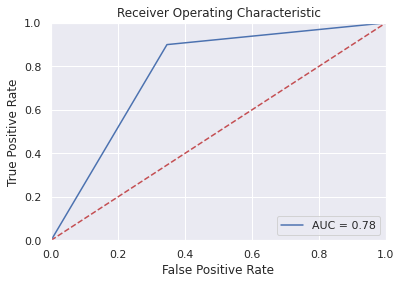

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, threshold = roc_curve(y_test, y_pred_lr)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

Confusion Matrix (DT)

In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)
accuracy_score(y_test, y_pred_dt)

[[24  2]
 [ 5 25]]


0.875

ROC Curve (DT)

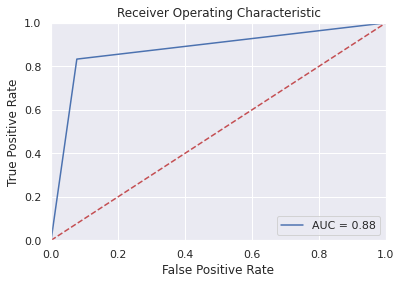

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, threshold = roc_curve(y_test, y_pred_dt)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=5, random_state=0, criterion='gini', max_depth = 4)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Confusion Matrix (RF)

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
accuracy_score(y_test, y_pred_rf)

[[20  6]
 [ 2 28]]


0.8571428571428571

ROC Curve (RF)

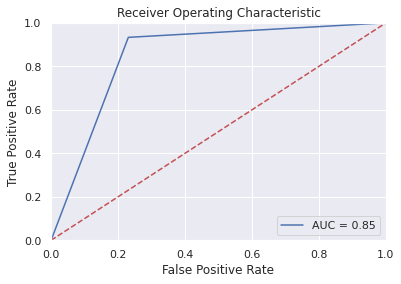

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, threshold = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## ADA Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=5, random_state=0)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix (ADA)

In [ ]:
cm_ada = confusion_matrix(y_test, y_pred_ada)
print(cm_ada)
accuracy_score(y_test, y_pred_ada)

[[20  6]
 [ 2 28]]


0.8571428571428571

ROC Curve (ADA)

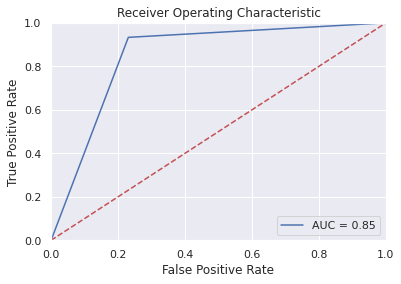

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, threshold = roc_curve(y_test, y_pred_ada)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### Conclusion

Considering that the dataset is related to detection of heart diseases, the factor of utmost importance is limiting the number of False Negative results. This means that the result says that the person does not have any heart condition when they actually do. Hence, by this measure, the following is the ranking of the algorithms:

1) SVM (1)

2) Random Forest (2)

3) ADA (2)

4) Logistic Regression (3)

5) Decision Tree (5)

**Ranking by Test accuracy:**

1) Decision Tree: 0.875

2) Random Forest: 0.857

3) ADA: 0.857

4) SVM: 0.839

5) Logistic Regression: 0.785

Since **Random Forest** algorithm gives us a **low false negatives** count as well as a relatively **high accuracy**, it is the preferred model for this dataset.